In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
import hashlib

In [2]:
data = pd.read_csv("NYPD_Complaint_Data_Historic.csv")
data

/var/folders/v7/rljxjzm17rnfvjvf_r6j19_w0000gn/T/ipykernel_68959/763524452.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/richardsoong/Downloads/NYPD_Complaint_Data_Historic.csv")


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,M,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,NaN,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,M,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,M,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,NaN,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521491,225471008,12/02/2018,04:15:00,12/02/2018,04:17:00,109.0,12/02/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.785050,-73.856852,"(40.785049616, -73.856851768)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F
6521492,368441925,01/20/2018,00:08:00,04/26/2019,12:00:00,25.0,04/26/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,F,NaN,NaN,NaN,NaN,PATROL BORO MAN NORTH,NaN,25-44,BLACK,M
6521493,146134182,08/03/2018,22:30:00,08/04/2018,06:30:00,41.0,08/04/2018,121,CRIMINAL MISCHIEF & RELATED OF,267.0,...,NaN,NaN,40.814612,-73.903637,"(40.814612305, -73.903637247)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
6521494,763119484,12/10/2018,11:00:00,12/21/2018,15:00:00,107.0,04/10/2019,340,FRAUDS,718.0,...,U,NaN,NaN,NaN,NaN,PATROL BORO QUEENS SOUTH,NaN,18-24,ASIAN / PACIFIC ISLANDER,M


In [3]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [4]:
int(data['CMPLNT_FR_DT'][0][6:])

2015

# Step 0) Defining the problem

**Does NY’s current predictive policing algorithm cause (not higher crime rates as we planned initially)?**
- Binary treatment Z: predictive policing implemented or not
-- NY started implementing predictive policing in 2013, our dataset 2006-2017
- Outcome Y: 'LAW_CAT_CD' -- felony (highest) or misdemeanor (medium) or violation (lowest)
- Confounders X: let's find out some potential ones below!

In [5]:
data['LAW_CAT_CD'].unique()

array(['MISDEMEANOR', 'VIOLATION', 'FELONY'], dtype=object)

First let's create a new column called 'treat' to identify which cities have bans vs not.

In [6]:
# Define function to determine treatment status based on predictive policing
def is_treated(row):
    if pd.isnull(row['CMPLNT_FR_DT']):  # Check if the date is missing
        return 0  # Return 0 if date is missing
    elif int(row['CMPLNT_FR_DT'][6:]) >= 2013:
        return 1
    else:
        return 0

# Apply the function to create the treatment column
data['treat'] = data.apply(is_treated, axis=1)
data

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,treat
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M,1
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F,0
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M,1
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F,1
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521491,225471008,12/02/2018,04:15:00,12/02/2018,04:17:00,109.0,12/02/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.785050,-73.856852,"(40.785049616, -73.856851768)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F,1
6521492,368441925,01/20/2018,00:08:00,04/26/2019,12:00:00,25.0,04/26/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,NaN,NaN,NaN,PATROL BORO MAN NORTH,NaN,25-44,BLACK,M,1
6521493,146134182,08/03/2018,22:30:00,08/04/2018,06:30:00,41.0,08/04/2018,121,CRIMINAL MISCHIEF & RELATED OF,267.0,...,NaN,40.814612,-73.903637,"(40.814612305, -73.903637247)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F,1
6521494,763119484,12/10/2018,11:00:00,12/21/2018,15:00:00,107.0,04/10/2019,340,FRAUDS,718.0,...,NaN,NaN,NaN,NaN,PATROL BORO QUEENS SOUTH,NaN,18-24,ASIAN / PACIFIC ISLANDER,M,1


Also get rid of nans which will give us trouble later

In [7]:
# Drop columns with 95% or more NaN values
threshold = 0.95 * len(data)  # 95% threshold
data.dropna(axis=1, thresh=threshold, inplace=True)

In [8]:
# Impute missing values in numeric columns with median
numeric_columns = data.select_dtypes(include='number').columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Drop rows with missing values in non-numeric columns
non_numeric_columns = data.select_dtypes(exclude='number').columns
data.dropna(subset=non_numeric_columns, inplace=True)

data

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_RACE,VIC_SEX,treat
0,325341655,02/11/2015,15:00:00,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,COMPLETED,...,2.0,1009656.0,181287.0,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,BLACK,M,1
1,393816841,03/17/2012,10:30:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,COMPLETED,...,0.0,1014035.0,174133.0,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,BLACK,F,0
2,802896158,10/27/2016,13:48:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,0.0,1000222.0,179282.0,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,BLACK,M,1
3,633812343,11/27/2014,19:00:00,112.0,11/28/2014,104,RAPE,157.0,RAPE 1,COMPLETED,...,0.0,1025420.0,202485.0,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,WHITE,F,1
4,300349533,12/11/2013,13:30:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,...,0.0,992848.0,228356.0,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,WHITE,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521488,120248300,09/11/2018,22:30:00,110.0,09/11/2018,111,POSSESSION OF STOLEN PROPERTY,494.0,"STOLEN PROPERTY 2,1,POSSESSION",COMPLETED,...,0.0,1023077.0,209595.0,40.741889,-73.859886,"(40.741889466, -73.859885609)",PATROL BORO QUEENS NORTH,UNKNOWN,E,1
6521489,180596560,01/15/2018,14:23:00,47.0,01/15/2018,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,...,0.0,1022069.0,259203.0,40.878054,-73.863244,"(40.878053859, -73.863243713)",PATROL BORO BRONX,BLACK,F,1
6521490,142216265,08/07/2018,14:42:00,78.0,08/07/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,...,0.0,988748.0,184175.0,40.672202,-73.983786,"(40.672201645, -73.983786381)",PATROL BORO BKLYN SOUTH,BLACK,M,1
6521491,225471008,12/02/2018,04:15:00,109.0,12/02/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,...,0.0,1023892.0,225321.0,40.785050,-73.856852,"(40.785049616, -73.856851768)",PATROL BORO QUEENS NORTH,ASIAN / PACIFIC ISLANDER,F,1


In [9]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 'RPT_DT',
       'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC',
       'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'PATROL_BORO', 'VIC_RACE', 'VIC_SEX', 'treat'],
      dtype='object')

In [10]:
list1 = ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 'RPT_DT',
       'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC',
       'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'PATROL_BORO', 'VIC_RACE', 'VIC_SEX', 'treat']

list2 = ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']

columns_dropped = set(list2) - set(list1)
print(columns_dropped)

{'CMPLNT_TO_TM', 'CMPLNT_TO_DT', 'SUSP_AGE_GROUP', 'STATION_NAME', 'HOUSING_PSA', 'VIC_AGE_GROUP', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'SUSP_RACE', 'HADEVELOPT', 'SUSP_SEX', 'TRANSIT_DISTRICT'}


# Step 1) Identify possible confounders

In [11]:
# Let's create separate dataframes for treatment and control groups
pp_group = data[data['treat'] == 1]
nopp_group = data[data['treat'] == 0]

# List of variables to plot histograms for
variables = [col for col in data.columns if col != 'treat']

Let's use the Mann-Whitney U test to assess whether two independent samples come from the same distribution. If the p-value is less than a chosen significance level (usually 0.05), you reject the null hypothesis and conclude that there is a statistically significant difference between the groups.
This acts as a quantitative way to help confirm whether the observed differences between the treatment and control groups are statistically meaningful -- and in effect determine if it is a possible confounder.

In [12]:
# Mann Whitney cannot process non-numeric data
numeric = data[numeric_columns]
numeric_pp_group = numeric[numeric['treat'] == 1]
numeric_nopp_group = numeric[numeric['treat'] == 0]

# List of variables to plot histograms for
numeric_variables = [col for col in numeric.columns if col != 'treat']

In [13]:
numeric_pp_group

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,treat
0,325341655,73.0,359,749.0,2.0,1009656.0,181287.0,40.664239,-73.908425,1
2,802896158,71.0,578,638.0,0.0,1000222.0,179282.0,40.658758,-73.942435,1
3,633812343,112.0,104,157.0,0.0,1025420.0,202485.0,40.722364,-73.851474,1
4,300349533,24.0,109,438.0,0.0,992848.0,228356.0,40.793465,-73.968950,1
5,944253539,63.0,341,333.0,0.0,1007048.0,167105.0,40.625320,-73.917874,1
...,...,...,...,...,...,...,...,...,...,...
6521488,120248300,110.0,111,494.0,0.0,1023077.0,209595.0,40.741889,-73.859886,1
6521489,180596560,47.0,341,338.0,0.0,1022069.0,259203.0,40.878054,-73.863244,1
6521490,142216265,78.0,344,101.0,0.0,988748.0,184175.0,40.672202,-73.983786,1
6521491,225471008,109.0,344,101.0,0.0,1023892.0,225321.0,40.785050,-73.856852,1


In [14]:
numeric_nopp_group

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,treat
1,393816841,69.0,344,114.0,0.0,1014035.0,174133.0,40.644590,-73.892672,0
10,450452011,26.0,106,109.0,0.0,997234.0,235805.0,40.813905,-73.953095,0
16,253264123,44.0,235,511.0,0.0,1007839.0,246906.0,40.844352,-73.914744,0
27,774277905,13.0,118,792.0,0.0,989360.0,206199.0,40.732652,-73.981563,0
34,600812557,34.0,361,639.0,0.0,1004036.0,250882.0,40.855274,-73.928478,0
...,...,...,...,...,...,...,...,...,...,...
6520532,583021249,48.0,109,419.0,0.0,1014601.0,253022.0,40.861118,-73.890277,0
6520699,719798187,40.0,351,254.0,0.0,1004958.0,237310.0,40.818021,-73.925187,0
6520903,771351076,13.0,578,638.0,0.0,985452.0,208506.0,40.738986,-73.995664,0
6520985,330405943,83.0,112,739.0,0.0,1010367.0,191737.0,40.692920,-73.905822,0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

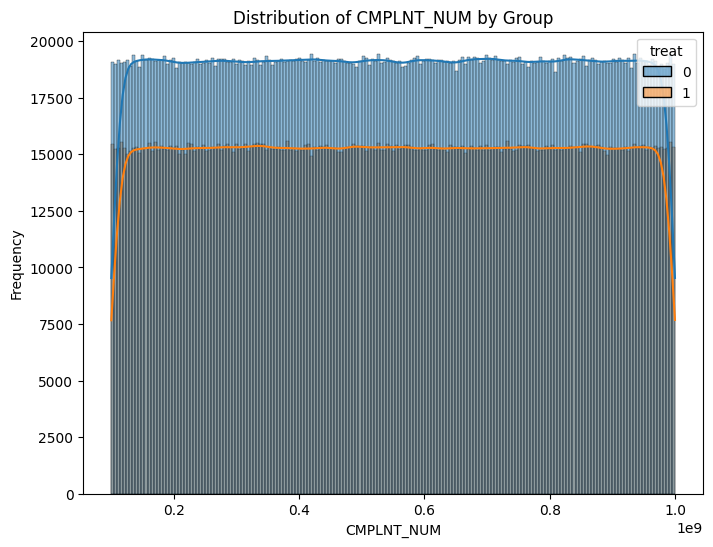

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


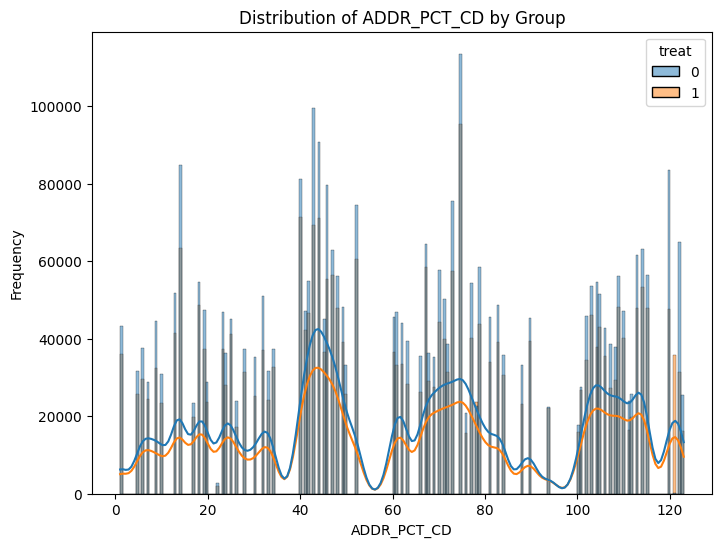

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

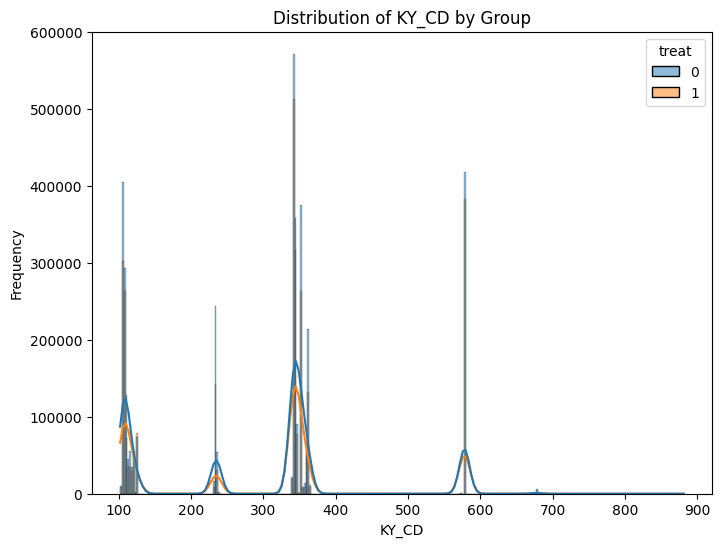

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


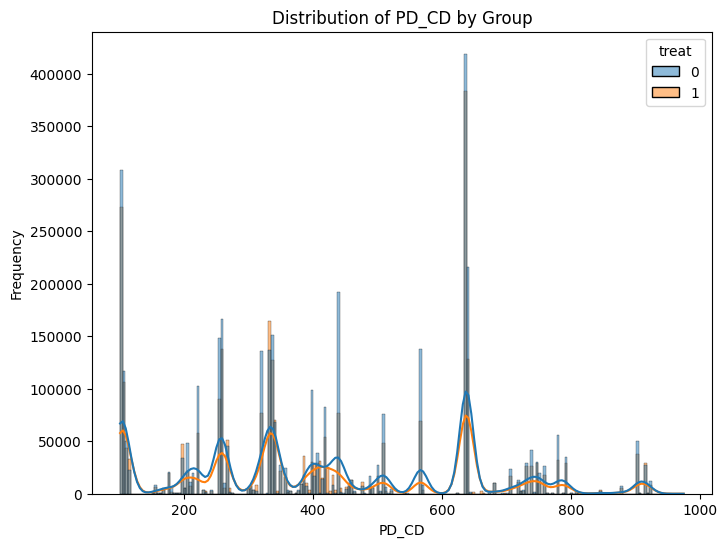

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


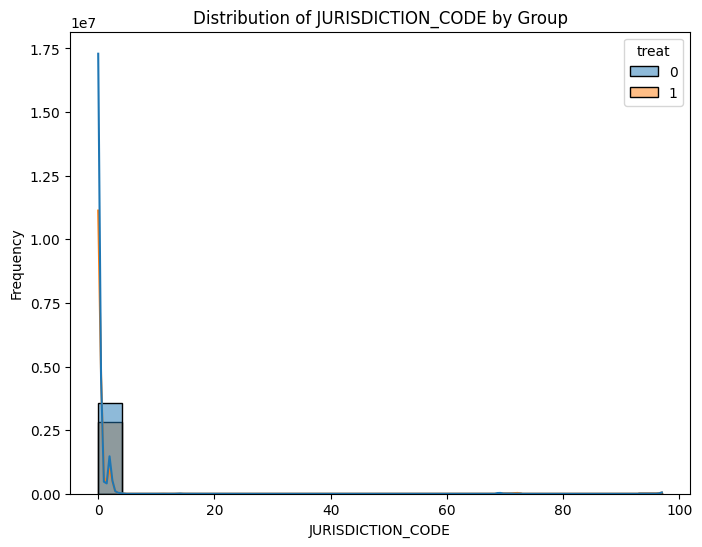

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


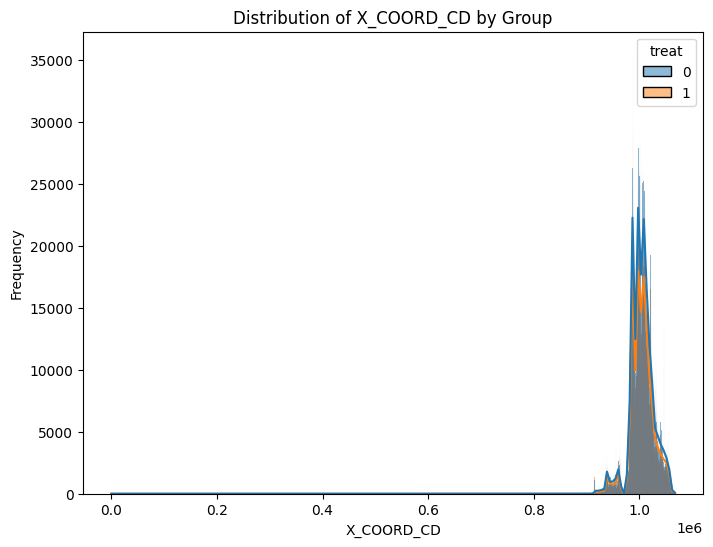

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


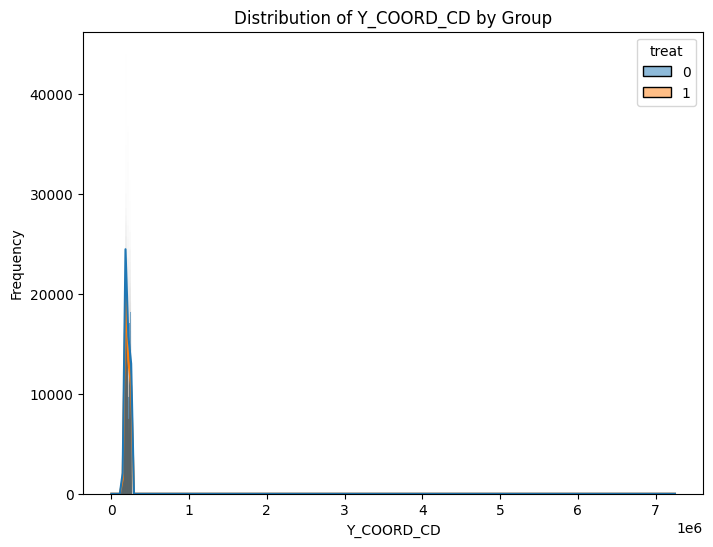

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


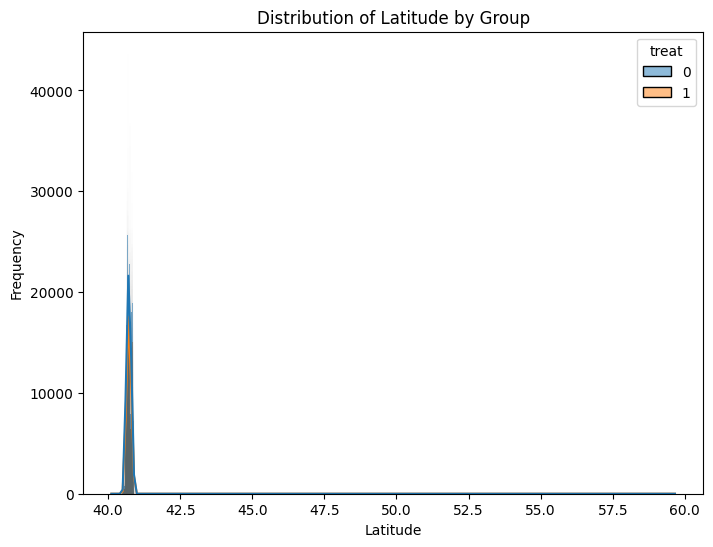

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


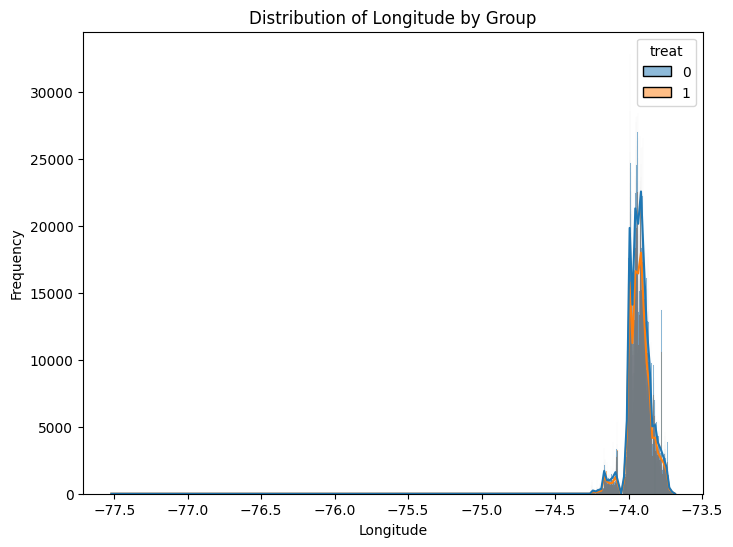

In [15]:
# Visual inspection of the distribution using histograms
for variable in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=numeric, x=variable, hue='treat', kde=True)
    plt.title(f'Distribution of {variable} by Group')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

In [16]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each variable
for variable in numeric_variables:
    u_stat, p_value = mannwhitneyu(numeric_pp_group[variable], numeric_nopp_group[variable], alternative='two-sided')
    print(f"Mann-Whitney U test for {variable}:")
    print(f"   U statistic: {u_stat}")
    print(f"   p-value: {p_value}")
    if p_value < 0.05:
        print("   Conclusion: There is a statistically significant difference between the groups.")
    else:
        print("   Conclusion: There is no statistically significant difference between the groups.")
    print()


Mann-Whitney U test for CMPLNT_NUM:
   U statistic: 5114410191191.0
   p-value: 0.7822998936876222
   Conclusion: There is no statistically significant difference between the groups.

Mann-Whitney U test for ADDR_PCT_CD:
   U statistic: 5111014536975.5
   p-value: 0.2405321316351211
   Conclusion: There is no statistically significant difference between the groups.

Mann-Whitney U test for KY_CD:
   U statistic: 5159983540311.0
   p-value: 1.725453542751991e-87
   Conclusion: There is a statistically significant difference between the groups.

Mann-Whitney U test for PD_CD:
   U statistic: 4986467450188.0
   p-value: 0.0
   Conclusion: There is a statistically significant difference between the groups.

Mann-Whitney U test for JURISDICTION_CODE:
   U statistic: 5143243277543.0
   p-value: 1.0984289459614415e-36
   Conclusion: There is a statistically significant difference between the groups.

Mann-Whitney U test for X_COORD_CD:
   U statistic: 5153885674355.0
   p-value: 8.71911519825

Confounders are the ones with statistically different
- KY_CD: Three digit internal classification code -- each one refer to a diff OFNS_DESC aka Description of offense corresponding with key code
- PD_CD: Three digit internal classification code -- each one refer to a diff PD_DESC aka whether its petite larceny or drug or eth
- JURISDICTION_CODE: Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.
- X_COORD_CD: X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet
- Y_COORD_CD: ^ same but Y-coordinate
- Latitude: Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees
- Longitude: ^ but longitude

Basically, confounders is **type of offense, what jurisdiction, and location**

# Step 2) Evaluate this confounder - compute SDO

In [17]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_RACE,VIC_SEX,treat
0,325341655,02/11/2015,15:00:00,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,COMPLETED,...,2.0,1009656.0,181287.0,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,BLACK,M,1
1,393816841,03/17/2012,10:30:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,COMPLETED,...,0.0,1014035.0,174133.0,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,BLACK,F,0
2,802896158,10/27/2016,13:48:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,0.0,1000222.0,179282.0,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,BLACK,M,1
3,633812343,11/27/2014,19:00:00,112.0,11/28/2014,104,RAPE,157.0,RAPE 1,COMPLETED,...,0.0,1025420.0,202485.0,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,WHITE,F,1
4,300349533,12/11/2013,13:30:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,...,0.0,992848.0,228356.0,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,WHITE,F,1


In [18]:
# SDO dont work bc outcome var in this case is categorical -- so use chi squared test instead
from scipy.stats import chi2_contingency

# create contingency table
contingency_table = pd.crosstab(data['treat'], data['LAW_CAT_CD'])

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square value:", chi2)
print("p-value:", p)

Chi-square value: 4571.974958377569
p-value: 0.0


Chi-square value measures the strength of the association between variables.
- Since our chi-square value of ~25.638 is pretty large (>20), this tells us that the treatment and the outcome variable has a very strong association

The p-value indicates the probability of observing the chi-square value or a more extreme value if there is no association between the variables.
- Our extremely small p-value of ~2.708e-06 suggests that the association observed in the data is unlikely to be due to random chance alone because under any conventional significant level/p-val cutoff, we can still reject the null hypothesis that there is no association between the treatment and the outcome.

All in all -- there is a statistically significant association between the implementation of predictive policing and the categories of criminal offenses (misdemeanor, violation, felony) in New York.

# Step 3) Unconfoundedness Techniques

## Outcome Regression

In [19]:
#create treatment variable
def createtreatment(instance):
    if int(instance["CMPLNT_FR_DT"][6:])>=2013:
        return 1
    else:
        return 0
data["treatment"]=data.apply(createtreatment,axis=1)

In [20]:
#function to fit an OLS model
#taken from lab 8
def fit_OLS_model(data,target_variable,explanatory_variables,intercept=False):
    target=data[target_variable]
    inputs=data[explanatory_variables]
    if intercept:
        inputs=sm.add_constant(inputs)
    fitted_model=sm.OLS(target,inputs).fit()
    return(fitted_model)

In [21]:
#change LAW_CAT_CD into a numerical variable
data["lawcatcd_numerical"]=data["LAW_CAT_CD"].replace("VIOLATION",1).replace("MISDEMEANOR",2).replace("FELONY",3)

/var/folders/v7/rljxjzm17rnfvjvf_r6j19_w0000gn/T/ipykernel_68959/964516124.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["lawcatcd_numerical"]=data["LAW_CAT_CD"].replace("VIOLATION",1).replace("MISDEMEANOR",2).replace("FELONY",3)


In [22]:
#OLS regression: outcome=lawcatcd_numerical, treatment=treat, explanatory=everything else
print(fit_OLS_model(data,"lawcatcd_numerical",["treat", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude"]).summary())

                            OLS Regression Results                            
Dep. Variable:     lawcatcd_numerical   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2061.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        11:10:12   Log-Likelihood:            -6.1925e+06
No. Observations:             6436152   AIC:                         1.239e+07
Df Residuals:                 6436146   BIC:                         1.239e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
treat                -0.0148      0.00

In [23]:
#Evaluating the model, the ATE estimates
#from lab 8
def draw_tau_hat(data=data, random_state=None):
    """Returns a single bootstrapped estimate of the ATE.

    Inputs:
        data: DataFrame of observed data
        random_state: integer to help standardize sampling output
        for grading and troubleshooting purposes
    Output:
        float, estimated average treatment effect
    """
    sample = data.sample(n=data.shape[0], replace=True, random_state=random_state)
    fit_model = fit_OLS_model(sample, 'lawcatcd_numerical',['treatment', 'PD_CD', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'])
    estimated_ate = fit_model.params['treatment']

    return estimated_ate

def get_bootstrapped_ate(data=data, n=1000):
    """Returns n bootstrapped estimates of the ATE.

    Inputs:
        data: DataFrame of observed data
        n: number of bootstrapped estimates we would like to return
    Output:
        list of estimated average treatment effects
    """
    estimates = []
    for i in np.arange(n):
        estimates.append(draw_tau_hat(data, random_state=42))
    return estimates

In [29]:
#from lab 8
ates = get_bootstrapped_ate(data, 100)
confidence_interval = [np.percentile(ates, 2.5),
                       np.percentile(ates, 97.5)]
print(f"Our 95% confidence interval ranges from {np.round(confidence_interval[0])} to {np.round(confidence_interval[1])}")

Our 95% confidence interval ranges from -0.0 to -0.0


Text(0.5, 1.0, 'Bootstrapped Estimates of the ATE')

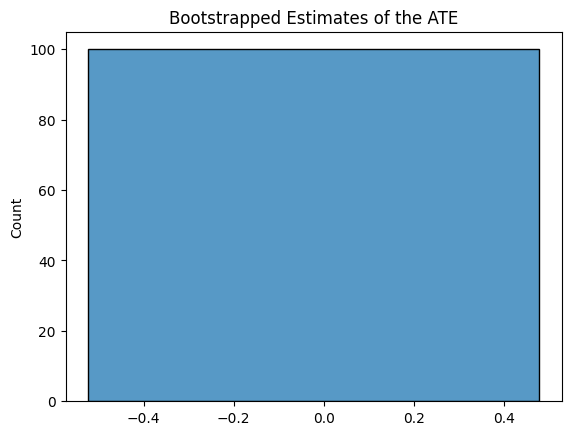

In [30]:
#from lab 8
sns.histplot(ates)
plt.hlines(1, confidence_interval[0], confidence_interval[1], linewidth=5)
plt.title("Bootstrapped Estimates of the ATE")

In [24]:
#function to fit a logistic model
#taken and modified from lab 8
def fit_logis_model(data,target_variable,explanatory_variables,intercept=False):
    target=data[target_variable]
    inputs=data[explanatory_variables]
    if intercept:
        inputs=sm.add_constant(inputs)
    fitted_model=sm.Logit(target,inputs).fit()
    return(fitted_model)

In [25]:
#create a one-hot encoded column for violations
def violation0or1(instance):
    if (instance["LAW_CAT_CD"]=="VIOLATION"):
        return 1
    else:
        return 0
data["isviolation"]=data.apply(violation0or1,axis=1)

In [26]:
#logistic regression: outcome=isviolation, treatment=treat, explanatory=everything else
print(fit_logis_model(data,"isviolation",["treat", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude"]).summary())

         Current function value: 0.379370
         Iterations: 35


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            isviolation   No. Observations:              6436152
Model:                          Logit   Df Residuals:                  6436146
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 May 2024   Pseudo R-squ.:                0.002021
Time:                        11:12:55   Log-Likelihood:            -2.4417e+06
converged:                      False   LL-Null:                   -2.4466e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
treat                 0.1522      0.002     64.089      0.000       0.148       0.157
JURISDICTION_CODE    -0.0122      0.000    -44.059      0.000      -0.013      -0.012
X_COORD_CD           -0.

In [27]:
#create a one-hot encoded column for misdemeanors
def misdemeanor0or1(instance):
    if (instance["LAW_CAT_CD"]=="MISDEMEANOR"):
        return 1
    else:
        return 0
data["ismisdemeanor"]=data.apply(misdemeanor0or1,axis=1)

In [31]:
#logistic regression: outcome=ismisdemeanor, treamtent=treat, explanatory=everything else
print(fit_logis_model(data,"ismisdemeanor",["treat", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude"]).summary())

Optimization terminated successfully.
         Current function value: 0.683040
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          ismisdemeanor   No. Observations:              6436152
Model:                          Logit   Df Residuals:                  6436146
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 May 2024   Pseudo R-squ.:                0.002192
Time:                        12:05:51   Log-Likelihood:            -4.3961e+06
converged:                       True   LL-Null:                   -4.4058e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
treat                -0.0778      0.002    -48.540      0.000      -0.081      -0.075
JURISDI

In [32]:
#create a one-hot encoded column for felonies
def felony0or1(instance):
    if (instance["LAW_CAT_CD"]=="FELONY"):
        return 1
    else:
        return 0
data["isfelony"]=data.apply(felony0or1,axis=1)

In [34]:
#logistic regression: outcome=isfelony, treatment=treat, explanatory=everything else
print(fit_logis_model(data,"isfelony",["treat", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude"]).summary())

Optimization terminated successfully.
         Current function value: 0.616064
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               isfelony   No. Observations:              6436152
Model:                          Logit   Df Residuals:                  6436146
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 May 2024   Pseudo R-squ.:                0.001991
Time:                        12:12:17   Log-Likelihood:            -3.9651e+06
converged:                       True   LL-Null:                   -3.9730e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
treat                 0.0101      0.002      5.869      0.000       0.007       0.013
JURISDIC

## Inverse Propensity Weighting

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define covariates (features) and treatment variable
covariates = ['JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']
treatment = 'treat'

# Fit logistic regression model to predict treatment based on covariates
logistic_model = LogisticRegression()
logistic_model.fit(data[covariates], data[treatment])

# Predict propensity scores for each observation
propensity_scores = logistic_model.predict_proba(data[covariates])[:, 1]

# Add propensity scores as a column to the dataset
data['propensity_score_nopdcd'] = propensity_scores
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_RACE,VIC_SEX,treat,propensity_score,LAW_CAT_CD_numeric,propensity_score_nopdcd
0,325341655,02/11/2015,15:00:00,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,COMPLETED,...,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,BLACK,M,1,0.358010,2,0.372501
1,393816841,03/17/2012,10:30:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,COMPLETED,...,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,BLACK,F,0,0.383153,2,0.369931
2,802896158,10/27/2016,13:48:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,BLACK,M,1,0.361832,1,0.371624
3,633812343,11/27/2014,19:00:00,112.0,11/28/2014,104,RAPE,157.0,RAPE 1,COMPLETED,...,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,WHITE,F,1,0.381893,3,0.370301
4,300349533,12/11/2013,13:30:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,...,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,WHITE,F,1,0.373958,3,0.375048


Text(0.5, 1.0, 'Propensity score of receiving the treatment (Predictive Policing) - calc score without PD_CD')

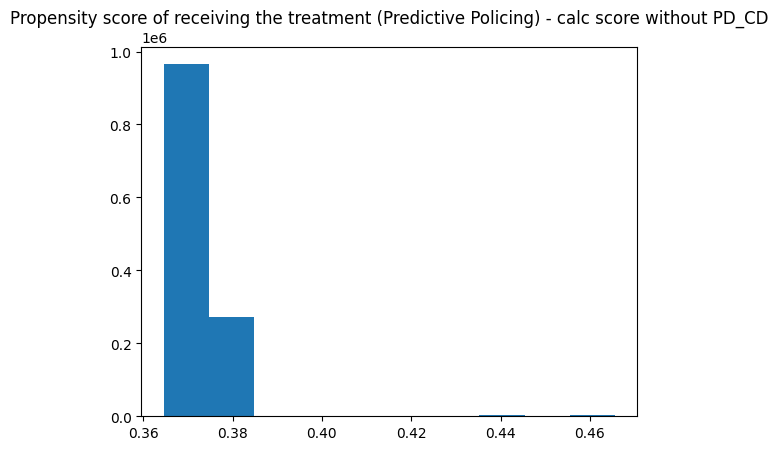

In [ ]:
plt.hist(data[data['treat'] == 1]['propensity_score_nopdcd'])
plt.title("Propensity score of receiving the treatment (Predictive Policing) - calc score without PD_CD")

Text(0.5, 1.0, 'Propensity score of receiving the treatment (No Predictive Policing) - calc score without PD_CD')

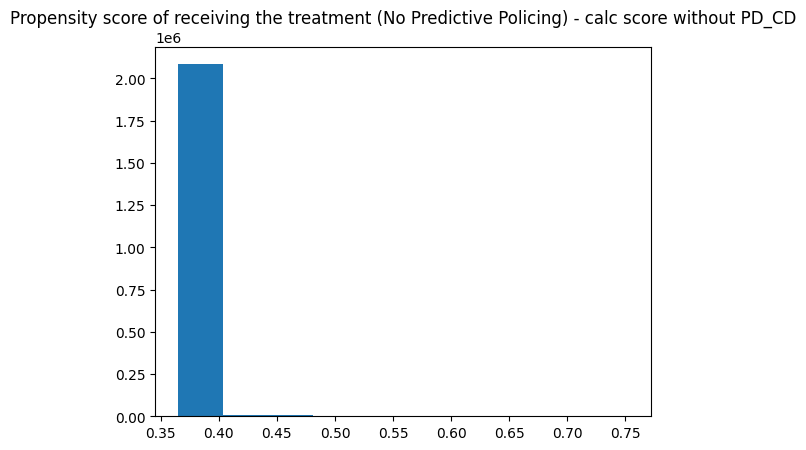

In [ ]:
plt.hist(data[data['treat'] == 0]['propensity_score_nopdcd'])
plt.title("Propensity score of receiving the treatment (No Predictive Policing) - calc score without PD_CD")

Propensity score 
- higher overall for non treatment group -- disregarding outliers, treatment group all <0.39 but for non-treatment <=0.40

In [ ]:
n=data.shape[0]

treated = data[data['treat']==1.0]
not_treated = data[data['treat']==0.0]

first = (1/n) * np.sum(treated['LAW_CAT_CD_numeric'] / data['propensity_score_nopdcd'])
second = (1/n) * np.sum(not_treated['LAW_CAT_CD_numeric'] / (1 - data['propensity_score_nopdcd']))

ipw_estimate_without_pdcd = first - second
ipw_estimate_without_pdcd

-0.0099020229564859